In [15]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
from fastai.imports import *
from fastai.conv_learner import *
from fastai.learner import *
from fastai.transforms import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *


In [17]:
path = 'data/Retinal/OCT2017/'

In [18]:
sz =224

In [19]:
!ls {path}

models	test  tmp  train


In [20]:
!ls {path}train

CNV  DME  DRUSEN  NORMAL


In [21]:
files = !ls {path}train/CNV |head

In [22]:
files

['CNV-1016042-100.jpeg',
 'CNV-1016042-101.jpeg',
 'CNV-1016042-102.jpeg',
 'CNV-1016042-103.jpeg',
 'CNV-1016042-104.jpeg',
 'CNV-1016042-105.jpeg',
 'CNV-1016042-106.jpeg',
 'CNV-1016042-107.jpeg',
 'CNV-1016042-108.jpeg',
 'CNV-1016042-109.jpeg']

In [23]:
len(files)

10

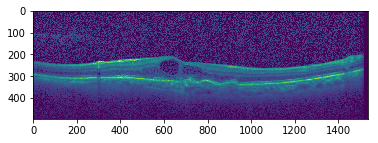

In [24]:
img = plt.imread(f'{path}train/CNV/{files[0]}')
plt.imshow(img)

In [25]:
img.shape

(496, 1536)

In [26]:
arch = resnet34
tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
data = ImageClassifierData.from_paths(path,bs=64,tfms =tfms_from_model(arch,sz),trn_name='train',val_name='test')



In [13]:
files = path+data.trn_ds.fnames[0]
files

'data/Retinal/OCT2017/train/CNV/CNV-81630-57.jpeg'

In [14]:
size= {k:PIL.Image.open(path+k).size for k in data.trn_ds.fnames}
size

{'train/CNV/CNV-81630-57.jpeg': (768, 496),
 'train/CNV/CNV-4370501-75.jpeg': (512, 496),
 'train/CNV/CNV-6106345-63.jpeg': (512, 496),
 'train/CNV/CNV-8082730-49.jpeg': (768, 496),
 'train/CNV/CNV-7732521-24.jpeg': (768, 496),
 'train/CNV/CNV-7710023-60.jpeg': (512, 496),
 'train/CNV/CNV-7513011-77.jpeg': (768, 496),
 'train/CNV/CNV-1188386-273.jpeg': (512, 496),
 'train/CNV/CNV-5431636-27.jpeg': (512, 496),
 'train/CNV/CNV-9642959-17.jpeg': (512, 496),
 'train/CNV/CNV-3715091-114.jpeg': (512, 496),
 'train/CNV/CNV-163081-226.jpeg': (1536, 496),
 'train/CNV/CNV-2120559-16.jpeg': (768, 496),
 'train/CNV/CNV-6604414-44.jpeg': (512, 496),
 'train/CNV/CNV-5557306-227.jpeg': (768, 496),
 'train/CNV/CNV-7315522-252.jpeg': (1536, 496),
 'train/CNV/CNV-9439639-134.jpeg': (768, 496),
 'train/CNV/CNV-2158467-11.jpeg': (512, 496),
 'train/CNV/CNV-829402-23.jpeg': (768, 496),
 'train/CNV/CNV-1779025-5.jpeg': (512, 496),
 'train/CNV/CNV-2760476-24.jpeg': (768, 496),
 'train/CNV/CNV-4691762-69.jpeg

In [15]:
rz_size , cl_size = list(zip(*size.values()))


In [16]:
row_size = np.array(rz_size)
col_size = np.array(cl_size)

(array([   16., 53348.,     0., 21485.,     0.,   274.,     0.,     0.,     0.,  8361.]),
 array([ 384. ,  499.2,  614.4,  729.6,  844.8,  960. , 1075.2, 1190.4, 1305.6, 1420.8, 1536. ]),
 <a list of 10 Patch objects>)

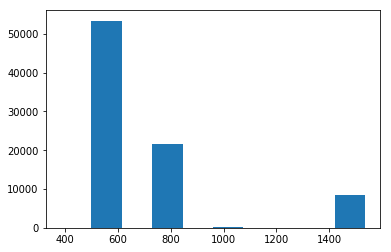

In [17]:
plt.hist(row_size)

(array([68028.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,     0., 15456.]),
 array([496. , 497.6, 499.2, 500.8, 502.4, 504. , 505.6, 507.2, 508.8, 510.4, 512. ]),
 <a list of 10 Patch objects>)

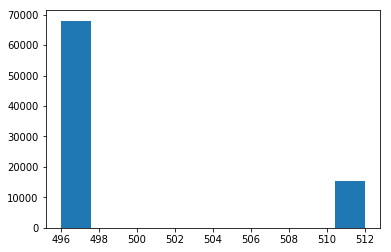

In [18]:
plt.hist(col_size)

In [27]:
learn = ConvLearner.pretrained(arch,data,precompute =True)

In [20]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 1057/1305 [00:06<00:01, 157.80it/s, loss=2.14] 


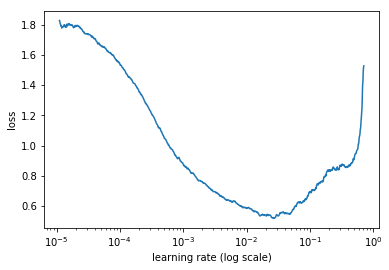

In [21]:
learn.sched.plot()

In [14]:
learn.fit(.006,15,cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

[0.      0.43294 0.32035 0.88086]                              
[1.      0.42354 0.28808 0.88867]                               
[2.      0.41317 0.278   0.88965]                               
[3.      0.375   0.24811 0.91016]                               
[4.      0.36568 0.25231 0.90625]                               
[5.      0.37403 0.24562 0.9082 ]                               
[6.      0.34512 0.2144  0.92773]                               
[7.      0.35549 0.23429 0.91504]                               
[8.      0.3313  0.21687 0.9209 ]                               
[9.      0.32945 0.22752 0.92188]                               
[10.       0.36222  0.23597  0.91602]                           
[11.       0.31742  0.194    0.9375 ]                           
[12.       0.33337  0.21651  0.91797]                           
[13.       0.34615  0.19324  0.9375 ]                           
[14.       0.31435  0.19555  0.93262]                           



In [15]:
learn.save('OpticalCoherence')

In [28]:
learn.load('OpticalCoherence')

In [29]:
lr = .006
lrs = np.array([lr/9,lr/3,lr])

In [30]:
precomute = False
learn.unfreeze()

In [31]:
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.31162 0.18778 0.94141]                              
[1.      0.31462 0.18844 0.94043]                              
[2.      0.30971 0.20933 0.9248 ]                              
[3.      0.33256 0.18307 0.93652]                              
[4.      0.3057  0.17243 0.93848]                              
[5.      0.3041  0.19713 0.93262]                              
[6.      0.29808 0.19337 0.93848]                              



In [31]:
learn.save('224_pre_Retinal')

In [14]:
learn.load('224_pre_Retinal')